---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst  

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
df = pd.read_csv("../input/sbikedata.csv")
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [3]:
df.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

```
- 가설 1(예시) : 
    - 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    - 대립가설: 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 :
    - 귀무가설: 온도와 따릉이간에는 연광성이 없다.
    - 대립가설: 온도와 따릉이간에는 연광성이 있다.

- 가설 3 :
    - 귀무가설: 미세먼지와 따릉이간에는 연광성이 없다.
    - 대립가설: 미세먼지와 따릉이간에는 연광성이 있다.

- 가설 4 :
    - 귀무가설: 시간과 따릉이간에는 연광성이 없다.
    - 대립가설: 시간과 따릉이간에는 연광성이 있다.

- 가설 5 :
    - 귀무가설: 풍속과 따릉이간에는 연광성이 없다.
    - 대립가설: 풍속과 따릉이간에는 연광성이 있다.

- 가설 6 :
    - 귀무가설: 습도와 따릉이간에는 연광성이 없다.
    - 대립가설: 습도와 따릉이간에는 연광성이 있다.
```

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [4]:
#변수의 자료형을 확인해보세요.
df["hour"].dtype, df["hour"].unique()

(dtype('int64'),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23,  0], dtype=int64))

* 수치형(이산형)

3. 변수의 결측치 존재 여부 및 조치방안

In [5]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["hour"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


    결측치는 없다

4. 변수의 기초 통계량 확인

In [6]:
#변수의 기초 통계량을 확인해보세요.
df["hour"].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

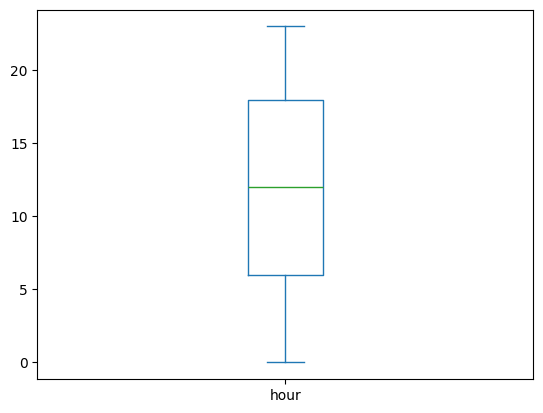

In [7]:
df["hour"].plot.box()
plt.show()

5. 변수의 분포 확인

In [8]:
df['hour'].value_counts()

hour
1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: count, dtype: int64

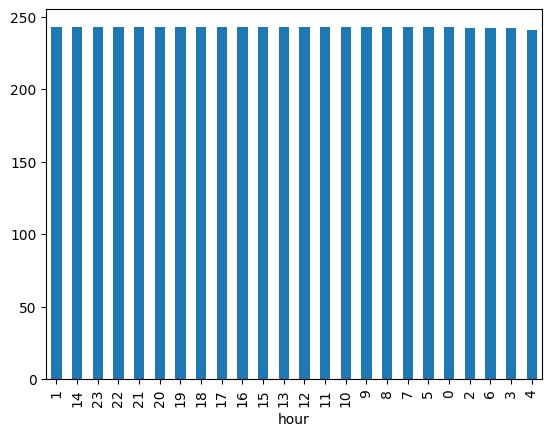

In [9]:
#변수의 분포를 확인해보세요.
df['hour'].value_counts().plot.bar()
plt.show()

    분포가 고르다

6. 위 정보로 부터 파악한 내용 정리

    시간 데이터는 고르다.

7. 추가 분석사항 도출

In [10]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    온도는 하루동안 낮시간에 올라갔다 밤시간에 내려갈 것이다.
    그리고 한해동안 여름에 올라갔다 겨울에 내려갈 것이다.

2. 변수가 수치형인지 범주형인지


In [11]:
#변수의 자료형을 확인해보세요.
df["temperature"].dtype

dtype('float64')

    수치형(연속형)

3. 변수의 결측치 존재 여부 및 조치방안

In [12]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["temperature"].isna().sum()

0

    결측치 없다.

4. 변수의 기초 통계량 확인

In [13]:
#변수의 기초 통계량을 확인해보세요
df["temperature"].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

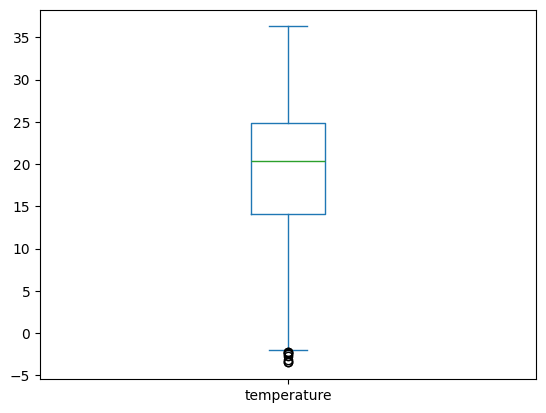

In [14]:
df["temperature"].plot.box()
plt.show()

    낮은 온도에서 극단치로 보이는 것들이 있다.  
    사실 날짜가 4월에서 11월까지라 낮은 온도 데이터가 별로 없다.  
    그러므로 이상치로 판단하기 힘들다. 

5. 변수의 분포 확인

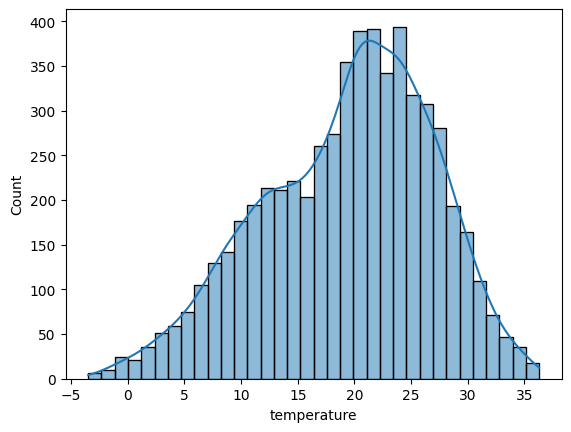

In [15]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="temperature", kde=True)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

    19도를 평균으로하는 -3~36도 사이의 분포를 가지고 있다.

7. 추가 분석사항 도출

In [16]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
date = pd.to_datetime(df['date'])
df["month"] = date.dt.month
df["day"] = date.dt.day
df.drop(columns="date", inplace=True)
df

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,day
0,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,1
1,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,1
2,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,1
3,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,1
4,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,11,29
5823,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,11,29
5824,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,11,29
5825,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,11,29


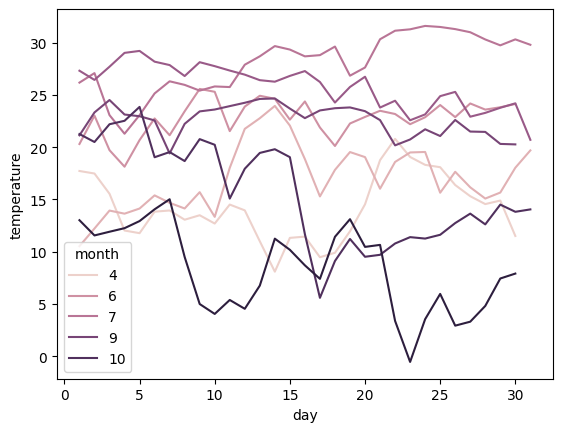

temperature
month day             
4     1      17.717391
      2      17.475000
      3      15.537500
      4      12.020833
      5      11.766667
...                ...
11    26      2.916667
      27      3.295833
      28      4.804167
      29      7.429167
      30      7.900000

[244 rows x 1 columns]

In [17]:
mean_temperature_df = df.groupby(["month", "day"])[["temperature"]].mean()
sns.lineplot(data=mean_temperature_df, x="day", y="temperature", hue="month")
plt.show()
mean_temperature_df

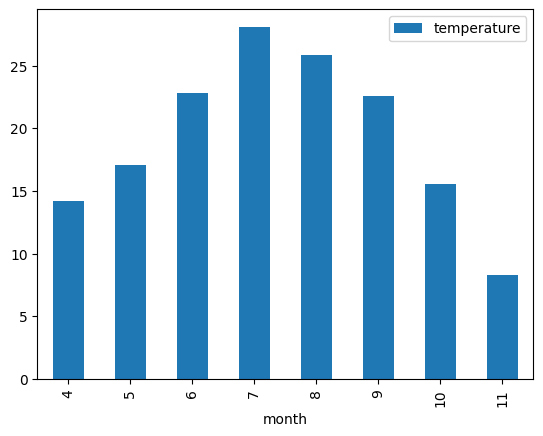

In [18]:
df.groupby("month")[["temperature"]].mean().plot.bar()
plt.show()

    7월이 가장 온도가 높고 11월이 낮은 분포를 보인다

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    강우 여부는 가장 영향을 줄 것으로 예상됨

2. 변수가 수치형인지 범주형인지


In [19]:
#변수의 자료형을 확인해보세요.
df["precipitation"].value_counts()

precipitation
0    5387
1     440
Name: count, dtype: int64

    범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [20]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["precipitation"].isna().sum()

0

    결측치 없다

4. 변수의 기초 통계량 확인

In [21]:
#변수의 기초 통계량을 확인해보세요
df["precipitation"].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

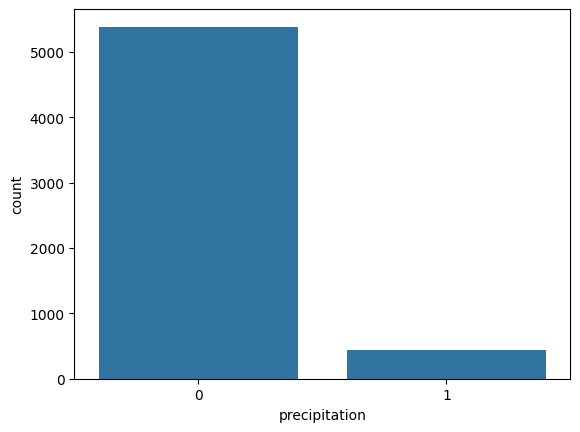

In [22]:
#변수의 분포를 확인해보세요.
sns.countplot(data=df, x="precipitation")
plt.show()

    비가 오지 않은 경우가 훨씬 많다

6. 위 정보로 부터 파악한 내용 정리

    불균형이다. 

7. 추가 분석사항 도출

In [23]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    풍속. 자전거 대여에 풍속을 고려하진 않을 것 같다.
    영향이 적을 듯하다.

2. 변수가 수치형인지 범주형인지


In [24]:
#변수의 자료형을 확인해보세요.
df["windspeed"].dtype

dtype('float64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [25]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["windspeed"].isna().sum()

0

    결측치 없다

4. 변수의 기초 통계량 확인

In [26]:
#변수의 기초 통계량을 확인해보세요
df["windspeed"].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

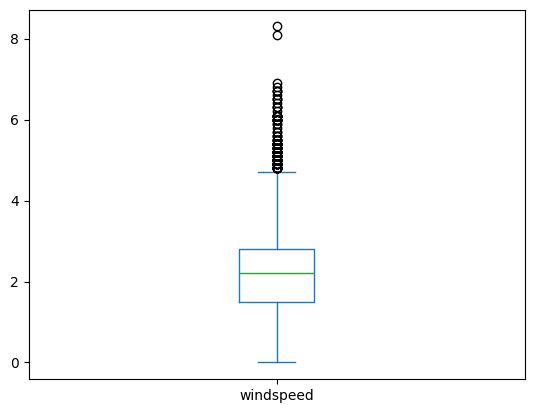

In [27]:
df["windspeed"].plot.box()
plt.show()

    4분위 이상의 값이 많다

5. 변수의 분포 확인

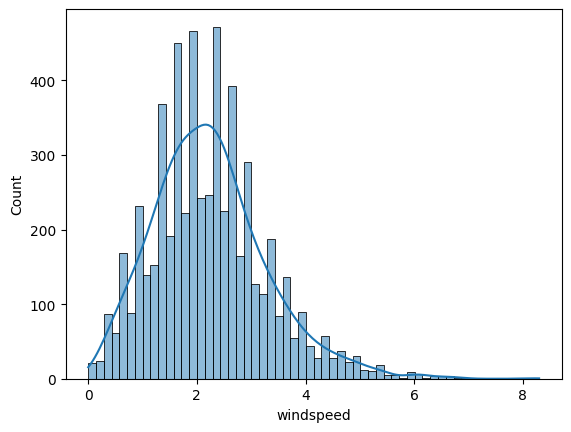

In [28]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="windspeed", kde=True)
plt.show()

In [29]:
df["windspeed"].skew()

0.7409678977943341

    왜도가 크다.
    왼쪽으로 치우쳐있다.

6. 위 정보로 부터 파악한 내용 정리

In [30]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    왜도가 크므로 해석에 문제가 생길 수 있다.
    비대칭성을 줄이기 위한 변환의 필요성

7. 추가 분석사항 도출

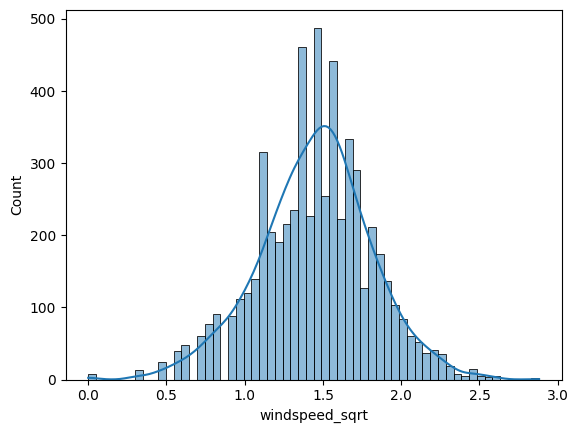

-0.16699951668203705

In [31]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
df["windspeed_sqrt"] = np.sqrt(df["windspeed"])
sns.histplot(data=df, x="windspeed_sqrt", kde=True)
plt.show()
df["windspeed_sqrt"].skew()

    sqrt함수로 왜도를 줄여 정규분포에 가깝게 변형한 파생변수를 생성

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    습도. 습도는 강우량과의 상관도 클 것이다.

2. 변수가 수치형인지 범주형인지


In [32]:
#변수의 자료형을 확인해보세요.
df["humidity"].dtype

dtype('int64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [33]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["humidity"].isna().sum()

0

    결측치 없다.

4. 변수의 기초 통계량 확인

In [34]:
#변수의 기초 통계량을 확인해보세요
df["humidity"].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

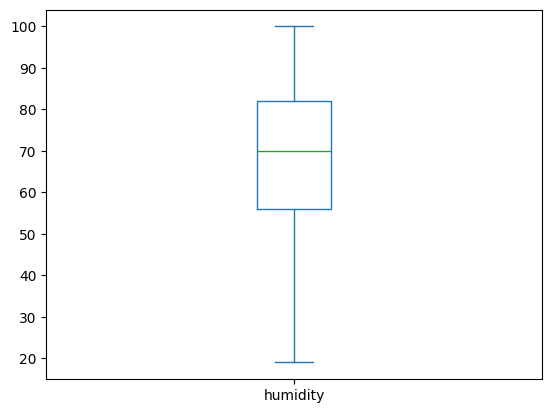

In [35]:
df["humidity"].plot.box()
plt.show()

5. 변수의 분포 확인

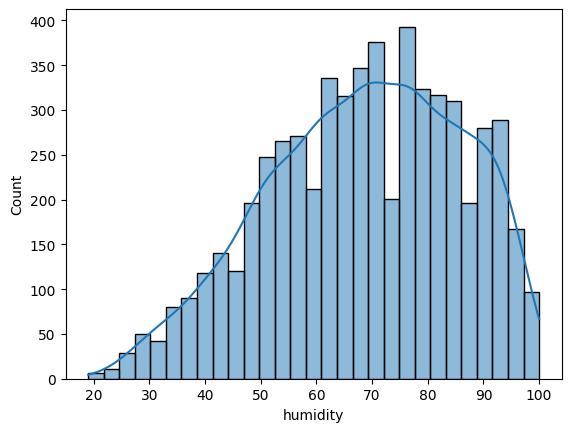

In [36]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="humidity", kde=True)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [37]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    습도는 최소 19에서 100도까지

7. 추가 분석사항 도출

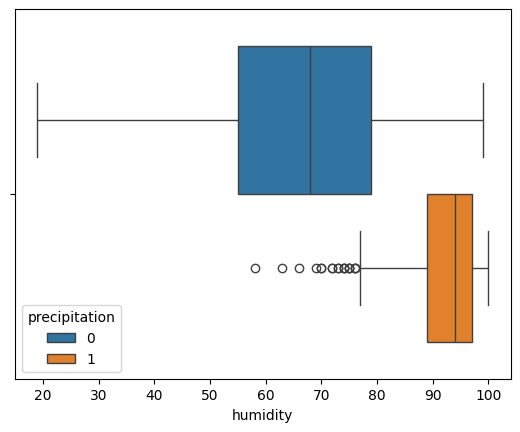

In [38]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
sns.boxplot(data=df, x="humidity", hue="precipitation")
plt.show()

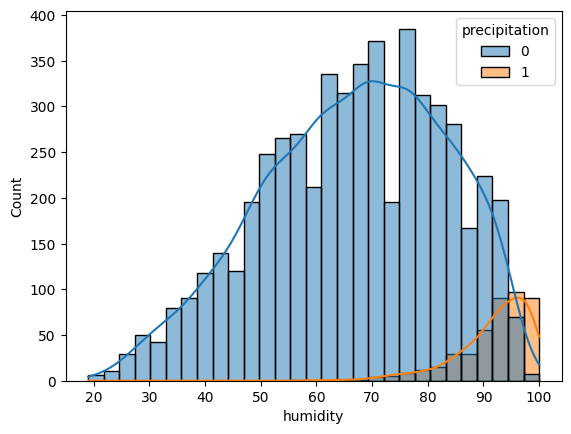

In [39]:
sns.histplot(data=df, x="humidity", hue="precipitation", kde=True)
plt.show()

In [40]:
rain_df = df.loc[df["precipitation"]==1]
clean_df = df.loc[df["precipitation"]==0]

In [41]:
rain_df["humidity"].describe()

count    440.000000
mean      91.856818
std        6.803453
min       58.000000
25%       89.000000
50%       94.000000
75%       97.000000
max      100.000000
Name: humidity, dtype: float64

    비가 왔을 땐 습도가 90이상을 가진다고 볼수 있다.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    시계는 어느 기준을 넘어가야 사람이 체감하지 않을까 생각

2. 변수가 수치형인지 범주형인지


In [42]:
#변수의 자료형을 확인해보세요.
df["visibility"].dtype

dtype('int64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [43]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["visibility"].isna().sum()

0

    결측치 없음

4. 변수의 기초 통계량 확인

In [44]:
#변수의 기초 통계량을 확인해보세요
df["visibility"].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

    평균과 중간값이 너무 다르다

5. 변수의 분포 확인

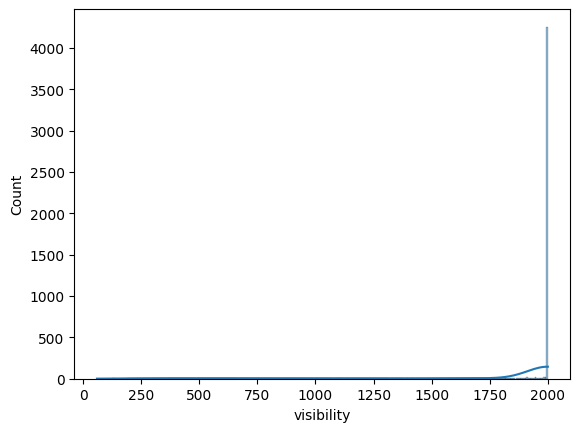

In [45]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="visibility", kde=True)
plt.show()

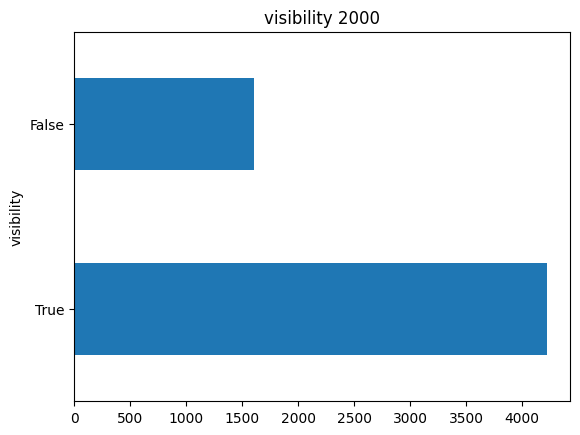

In [46]:
pd.Series(df["visibility"]==2000).value_counts().plot.barh()
plt.title("visibility 2000")
plt.show()

    2000에 데이터가 쏠려 있다.

6. 위 정보로 부터 파악한 내용 정리

    데이터의 치우쳐짐이 심해서 2000 값을 제외하고 볼 필요가 있다.

7. 추가 분석사항 도출

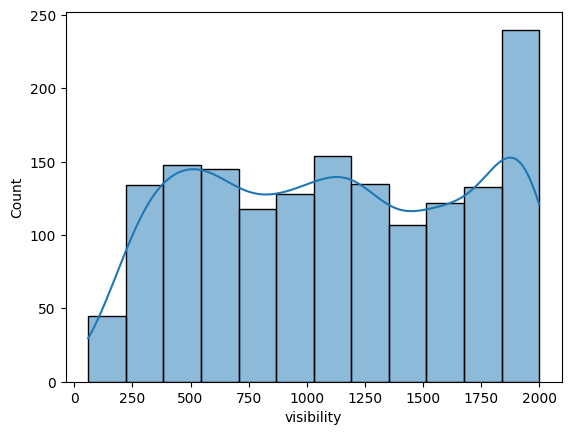

,visibility,count
count,1609.000000,1609.000000
mean,1125.184587,143.223741
std,564.831858,147.814976
min,60.000000,1.000000
25%,615.000000,24.000000
50%,1119.000000,91.000000
75%,1631.000000,227.000000
max,1999.000000,872.000000


In [47]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
under_visibility_df = df.loc[df["visibility"]<2000, ["visibility", "count"]]
sns.histplot(data=under_visibility_df, x="visibility", kde=True)
plt.show()
under_visibility_df.describe()

    시계 2000 이상은 측정불가로 상관관계를 파악하는데 방해가 되므로 제외하는 데이터프레임 생성

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    오존 수치, 대기질

2. 변수가 수치형인지 범주형인지


In [48]:
#변수의 자료형을 확인해보세요.
df["ozone"].dtype

dtype('float64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [49]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["ozone"].isna().sum()

128

In [50]:
f'{df["ozone"].isna().sum()/df.size*100}%'

'0.16897466700109567%'

    결측치 있다.
    전체 데이터 대비 0.19%로 비중이 적으므로 삭제한다.

In [51]:
df.dropna(axis=0, subset=["ozone"], inplace=True)
df.size

74087

4. 변수의 기초 통계량 확인

In [52]:
#변수의 기초 통계량을 확인해보세요
df["ozone"].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

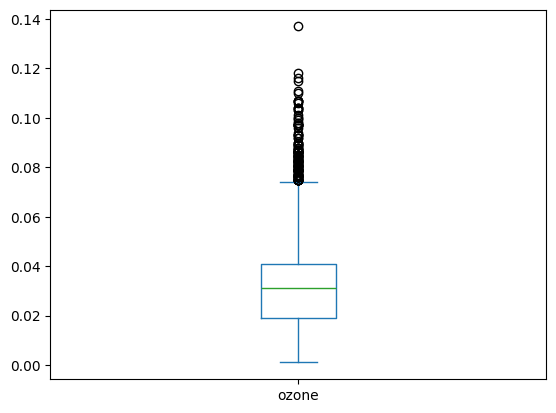

In [53]:
df["ozone"].plot.box()
plt.show()

5. 변수의 분포 확인

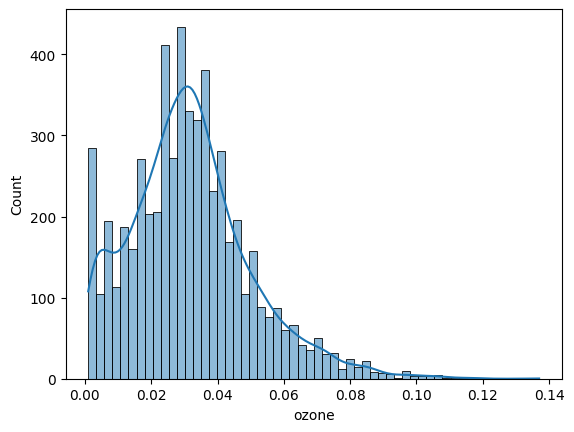

In [54]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="ozone", kde=True)
plt.show()

In [55]:
df["ozone"].skew()

0.7886215745361352

    왜도가 크다.
    왼쪽으로 치우쳐있다.

6. 위 정보로 부터 파악한 내용 정리

In [56]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    왜도가 크므로 해석에 문제가 생길 수 있다.
    비대칭성을 줄이기 위한 변환의 필요성

7. 추가 분석사항 도출

In [57]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
df["ozone_warning"] = df["ozone"]>0.12
df["ozone_advisory"] = df["ozone"]>0.30
df["ozone_warning"].sum(), df["ozone_advisory"].sum()

(1, 0)

일기예보의 주의보, 경보로 확인할 것이다.

    범주 추가
    주의보 조건: 0.12이상
    경보 조건: 0.30이상

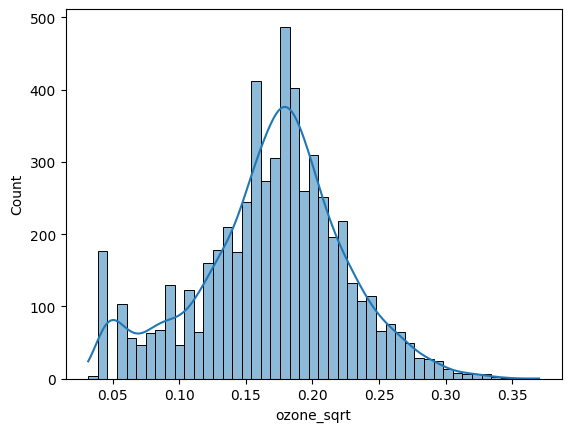

In [58]:
df["ozone_sqrt"] = np.sqrt(df["ozone"])
sns.histplot(data=df, x="ozone_sqrt", kde=True)
plt.show()

    sqrt함수로 왜도를 줄여 정규분포에 가깝게 변형한 파생변수를 생성

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    미세먼지 수치. 시계와 연관이 있을 것 같다.

2. 변수가 수치형인지 범주형인지


In [59]:
#변수의 자료형을 확인해보세요.
df["PM10"].dtype

dtype('float64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [60]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["PM10"].isna().sum()

22

In [61]:
f'{df["PM10"].isna().sum()/df.size*100}%'

'0.024127039831549395%'

    결측치 있다. 하지만 매우 적다.

In [62]:
df.dropna(axis=0, subset=["PM10"], inplace=True)
df.size

90832

4. 변수의 기초 통계량 확인

In [63]:
#변수의 기초 통계량을 확인해보세요
df["PM10"].describe()

count    5677.000000
mean       31.588339
std        42.786622
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

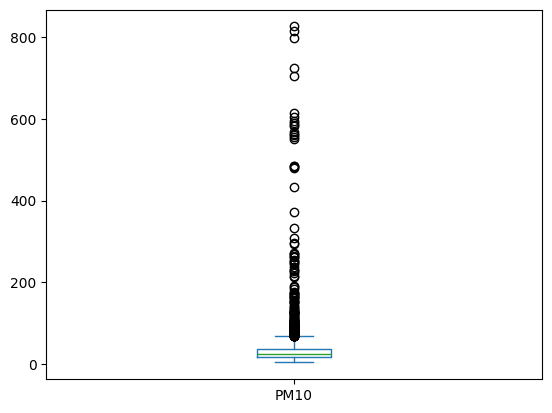

In [64]:
df["PM10"].plot.box()
plt.show()

5. 변수의 분포 확인

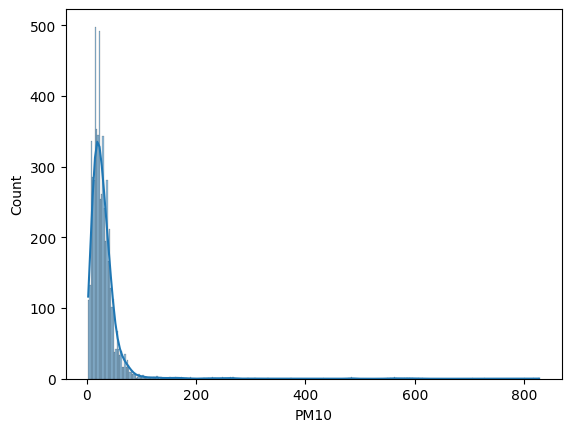

In [65]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="PM10", kde=True)
plt.show()

In [66]:
df["ozone"].skew()

0.7893669036868325

    왜도가 크다.
    왼쪽으로 치우쳐있다.

6. 위 정보로 부터 파악한 내용 정리

In [67]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    왜도가 크므로 해석에 문제가 생길 수 있다.
    비대칭성을 줄이기 위한 변환의 필요성

7. 추가 분석사항 도출

In [68]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
df["PM10_warning"] = df["PM10"]>150
df["PM10_advisory"] = df["PM10"]>300
df["PM10_warning"].sum(), df["PM10_advisory"].sum()

(62, 24)

    일기예보의 주의보, 경보로 확인할 것이다.

    범주 추가
    주의보 조건: 150이상
    경보 조건: 300이상

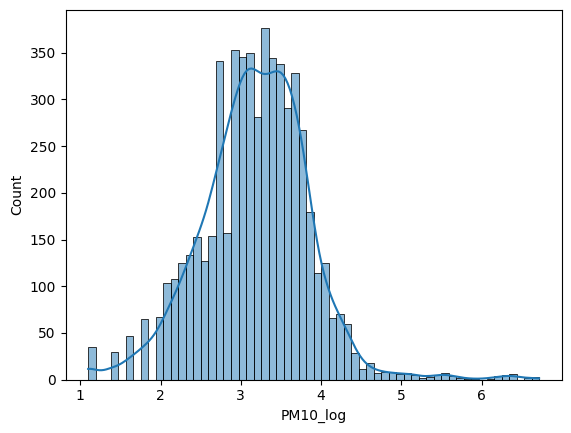

In [69]:
df["PM10_log"] = np.log(df["PM10"])
sns.histplot(data=df, x="PM10_log", kde=True)
plt.show()

In [70]:
df["PM10_log"].skew()

0.22873446178746168

    log함수로 왜도를 줄여 정규분포에 가깝게 변형한 파생변수를 생성

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    초미세먼지 수치. 미세먼지와 연결될 듯 하다.

2. 변수가 수치형인지 범주형인지


In [71]:
#변수의 자료형을 확인해보세요.
df["PM2.5"].dtype

dtype('float64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [72]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["PM2.5"].isna().sum()

7

In [73]:
df.dropna(axis=0, subset=["PM2.5"], inplace=True)
df.size

107730

4. 변수의 기초 통계량 확인

In [74]:
#변수의 기초 통계량을 확인해보세요
df["PM2.5"].describe()

count    5670.000000
mean       15.332451
std        12.860270
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

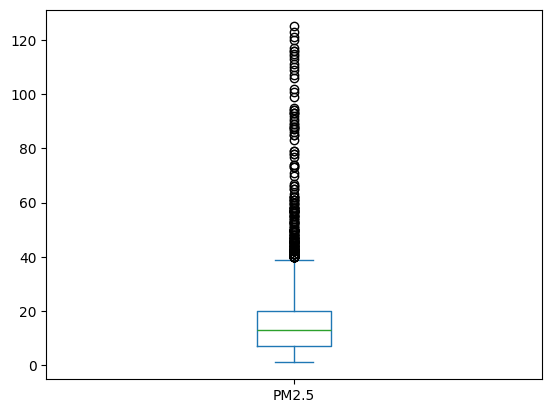

In [75]:
df["PM2.5"].plot.box()
plt.show()

5. 변수의 분포 확인

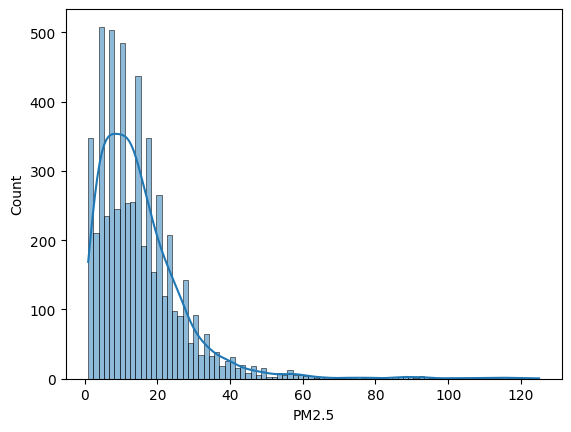

In [76]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="PM2.5", kde=True)
plt.show()

In [77]:
df["PM2.5"].skew()

2.884579632788696

6. 위 정보로 부터 파악한 내용 정리

In [78]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    왜도가 크므로 해석에 문제가 생길 수 있다.
    비대칭성을 줄이기 위한 변환의 필요성

7. 추가 분석사항 도출

    일기예보의 주의보, 경보로 확인할 것이다.

    범주 추가
    주의보 조건: 75이상
    경보 조건: 150이상

In [79]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
df["PM2.5_warning"] = df["PM2.5"]>75
df["PM2.5_advisory"] = df["PM2.5"]>150
df["PM2.5_warning"].sum(), df["PM2.5_advisory"].sum()

(43, 0)

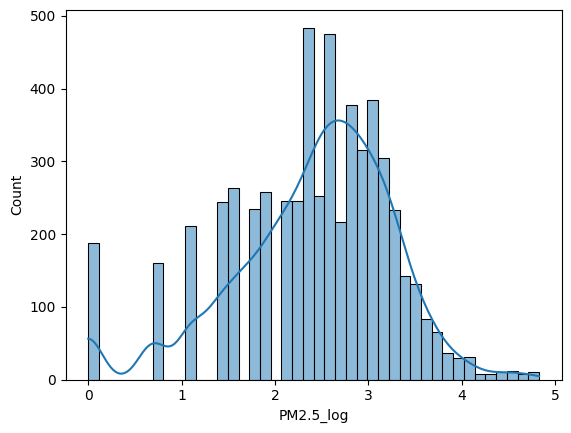

In [80]:
df["PM2.5_log"] = np.log(df["PM2.5"])
sns.histplot(data=df, x="PM2.5_log", kde=True)
plt.show()

    log함수로 왜도를 줄여 정규분포에 가깝게 변형한 파생변수를 생성

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [81]:
#변수의 자료형을 확인해보세요.
df["count"].dtype

dtype('int64')

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [82]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
df["count"].isna().sum()

0

    결측치 없다.

4. 변수의 기초 통계량 확인

In [83]:
#변수의 기초 통계량을 확인해보세요
df["count"].describe()

count    5670.000000
mean      215.869841
std       186.974342
min         1.000000
25%        53.000000
50%       186.000000
75%       317.000000
max      1746.000000
Name: count, dtype: float64

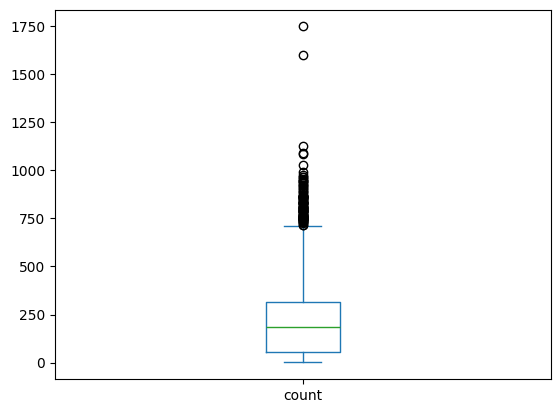

In [84]:
df["count"].plot.box()
plt.show()

5. 변수의 분포 확인

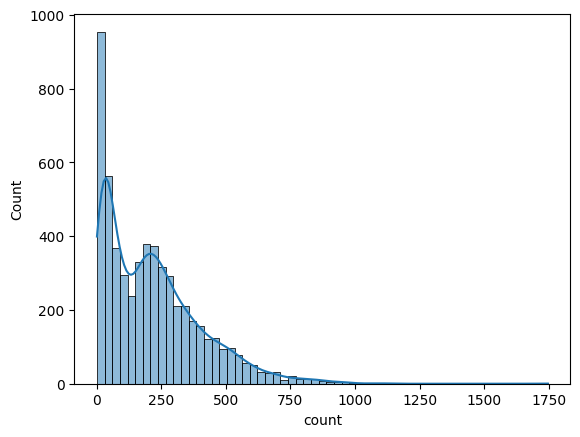

In [85]:
#변수의 분포를 확인해보세요.
sns.histplot(data=df, x="count", kde=True)
plt.show()

In [86]:
df["count"].skew()

1.2226738746737222

6. 위 정보로 부터 파악한 내용 정리

In [87]:
#위 정보로부터 파악하신 내용을 정리해보세요.
df[df["count"]>1500]

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,...,windspeed_sqrt,ozone_warning,ozone_advisory,ozone_sqrt,PM10_warning,PM10_advisory,PM10_log,PM2.5_warning,PM2.5_advisory,PM2.5_log
665,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600,...,1.732051,False,False,0.181659,False,False,3.891820,False,False,2.708050
3710,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746,...,1.449138,False,False,0.207364,False,False,2.995732,False,False,2.079442


    통계량에서 이상치가 보인다.
    1500 이상의 값은 따릉이 대회등 어떤 사유가 있을 것으로 보인다.
    이상치값 제거의 필요성이 있다.

In [88]:
df = df[df["count"]<1500]

    왜도가 크므로 해석에 문제가 생길 수 있다.
    비대칭성을 줄이기 위한 변환의 필요성

7. 추가 분석사항 도출

C:\Users\jwch1\AppData\Local\Temp\ipykernel_38240\2702887316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count_sqrt"] = np.sqrt(df["count"])


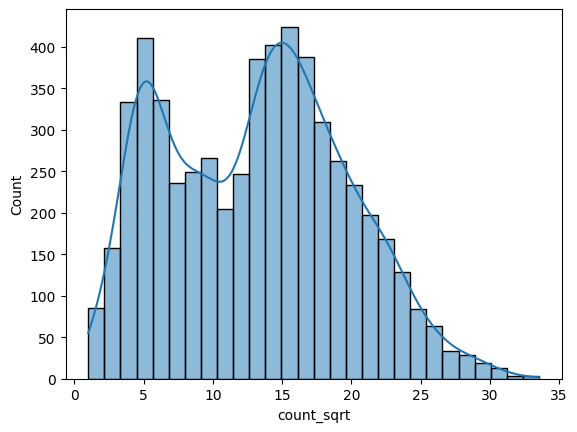

In [89]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
df["count_sqrt"] = np.sqrt(df["count"])
sns.histplot(data=df, x="count_sqrt", kde=True)
plt.show()

    sqrt함수로 왜도를 줄여 정규분포에 가깝게 변형한 파생변수를 생성

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

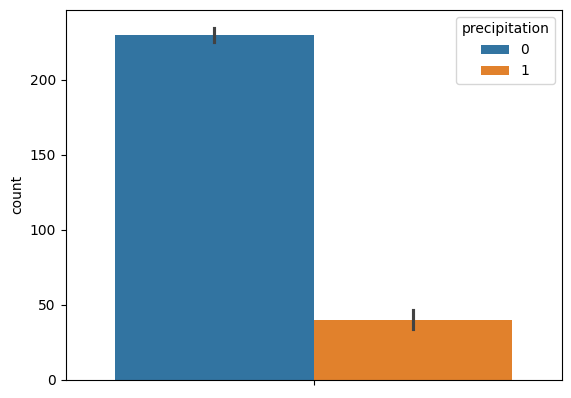

In [90]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(data=df,y="count", hue="precipitation")
plt.show()

In [91]:
df.loc[df["precipitation"]==0, "count"].var(), df.loc[df["precipitation"]==1, "count"].var()

(33903.2733685227, 4814.269595716374)

In [92]:
spst.ttest_ind(df.loc[df["precipitation"]==0, "count"], df.loc[df["precipitation"]==1, "count"], equal_var=False)

TtestResult(statistic=45.056561791310266, pvalue=1.4687330905588466e-245, df=1027.5729931191263)

    강수 여부와 따릉이 대여량간 분석의 결과는
    분산이 다르며
    pvalue가 0.05보다 현저히 작고 t통계량은 45로 평균의 차이가 있다.

In [93]:
spst.pointbiserialr(df["precipitation"], df["count"])

SignificanceResult(statistic=-0.2708104320204556, pvalue=7.5764437341794e-96)

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3보다 작다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

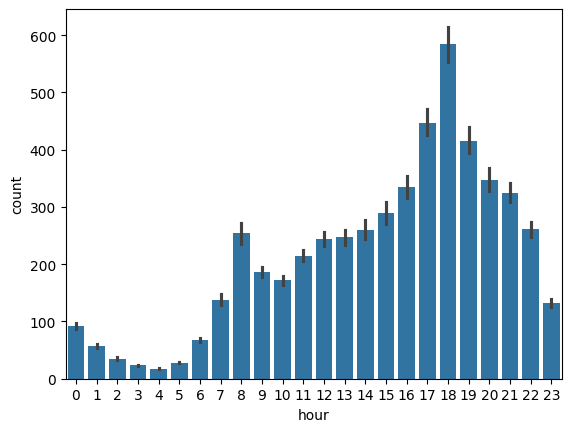

In [94]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(data=df, x="hour", y="count")
plt.show()

In [95]:
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.5914653996868893, pvalue=0.0)

    시간과 따릉이 대여량간 분석의 결과는

    pvalue는 0으로 통계적 유의성을 가지며
    피어슨상관계수는 0.59로 상관 관계가 있다.

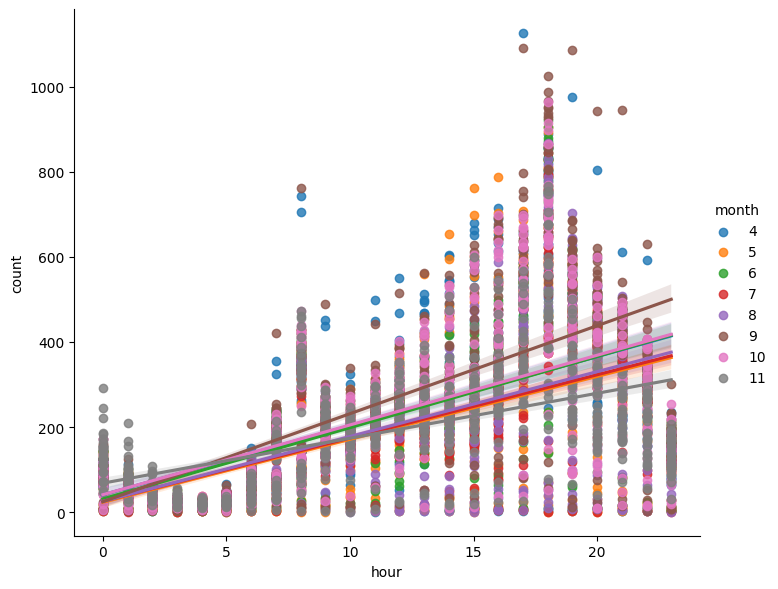

In [96]:
sns.lmplot(data=df, x="hour", y="count", hue="month", height=6, aspect=1.2)
plt.show()

In [97]:
for i in range(4,11):
    print(f'{i}월: ',spst.pearsonr(df.loc[df['month']==i, 'hour'], df.loc[df['month']==i, 'count']))

4월:  PearsonRResult(statistic=0.5692759762640803, pvalue=3.1931688405946102e-62)
5월:  PearsonRResult(statistic=0.5464501130985199, pvalue=1.5765118239781757e-58)
6월:  PearsonRResult(statistic=0.6408678187494096, pvalue=3.0224133168993416e-83)
7월:  PearsonRResult(statistic=0.6484376377189189, pvalue=5.937222965619052e-88)
8월:  PearsonRResult(statistic=0.5952391408313311, pvalue=7.530474102317927e-72)
9월:  PearsonRResult(statistic=0.6472162016268442, pvalue=8.350415098915311e-85)
10월:  PearsonRResult(statistic=0.6095483240534567, pvalue=7.68779463320297e-73)


    월별로 나누어서 보았을 때, 상관관계가 커진다.
    6,7,9월이 특히 커져서 여름에 더 상관관계가 크다고 생각할 수 있다.

3. 온도 데이터와 따릉이 대여량간 분석

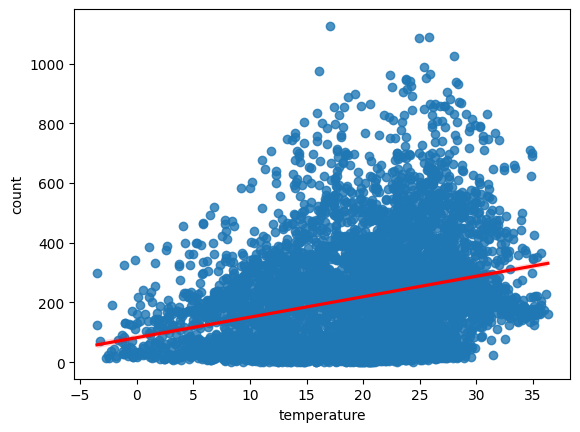

In [98]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=df, x="temperature", y="count", line_kws={'color': 'red'})
plt.show()

In [99]:
spst.pearsonr(df['temperature'], df['count'])

PearsonRResult(statistic=0.27639592208925107, pvalue=6.394984829630059e-100)

    온도와 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3보다 작다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

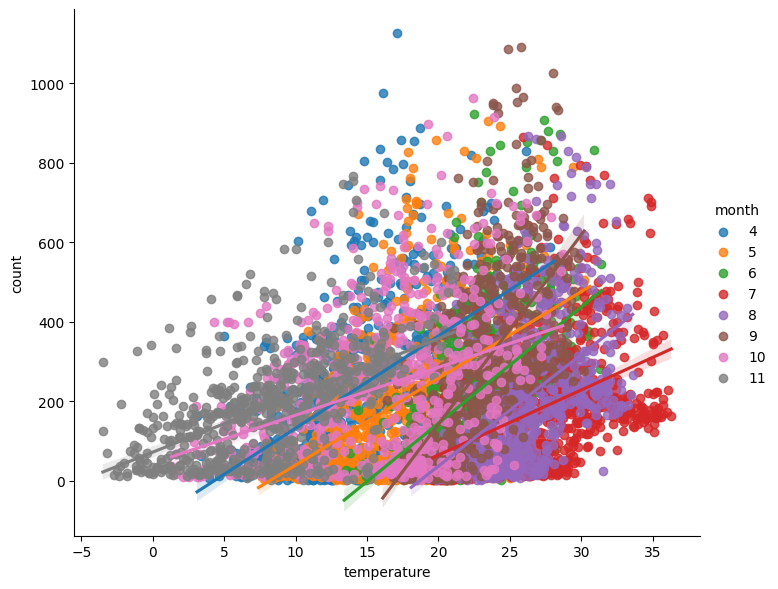

In [100]:
sns.lmplot(data=df, x="temperature", y="count", hue="month", height=6, aspect=1.2)
plt.show()

In [101]:
for i in range(4,11):
    print(f'{i}월: ',spst.pearsonr(df.loc[df['month']==i, 'temperature'], df.loc[df['month']==i, 'count']))

4월:  PearsonRResult(statistic=0.5366863375134243, pvalue=3.284806715600518e-54)
5월:  PearsonRResult(statistic=0.530059824790871, pvalue=1.4816102774835114e-54)
6월:  PearsonRResult(statistic=0.5443380743362561, pvalue=6.171705178599418e-56)
7월:  PearsonRResult(statistic=0.3812095805986598, pvalue=1.4643972480474733e-26)
8월:  PearsonRResult(statistic=0.4944880826972813, pvalue=1.0470258730559068e-46)
9월:  PearsonRResult(statistic=0.6449390882969297, pvalue=4.933197495570048e-84)
10월:  PearsonRResult(statistic=0.3661903889700129, pvalue=9.183321934429259e-24)


    월별로 나누어서 보았을 때, 상관관계가 커진다.
    특히 9월의 경우에는 피어슨상관계수가 0.6까지 도달해 비교적 상관성이 크다.

4. 풍속 데이터와 따릉이 대여량간 분석

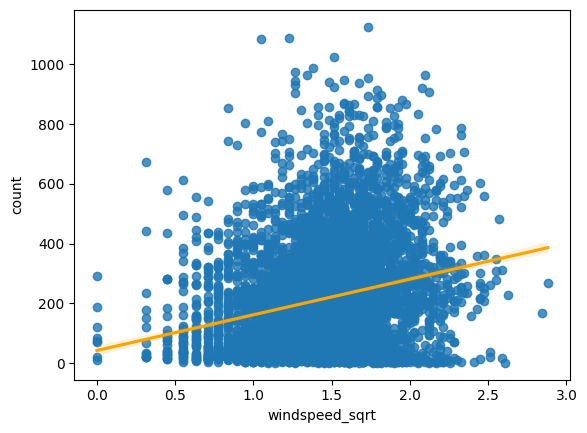

In [102]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=df, x="windspeed_sqrt", y="count", line_kws={'color': 'orange'})
plt.show()

In [103]:
spst.pearsonr(df['windspeed_sqrt'], df['count'])

PearsonRResult(statistic=0.23415534920298792, pvalue=1.8869112176513297e-71)

    풍속과 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3보다 작다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

5. 습도 데이터와 따릉이 대여량간 분석

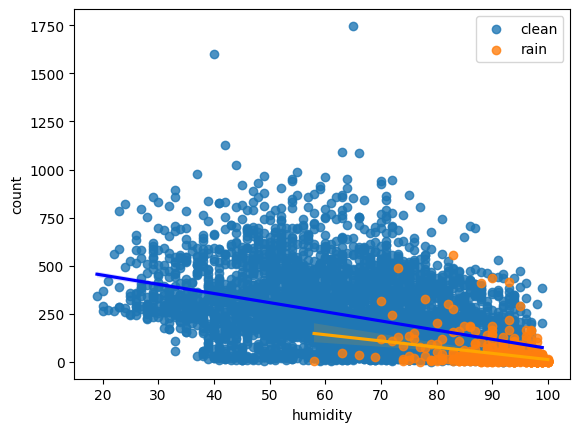

In [104]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=clean_df, x="humidity", y="count", line_kws={'color': 'blue'}, label="clean")
sns.regplot(data=rain_df, x="humidity", y="count", line_kws={'color': 'orange'}, label="rain")
plt.legend()
plt.show()

In [105]:
# 통합데이터
spst.pearsonr(df["humidity"], df["count"])

PearsonRResult(statistic=-0.4836195935042357, pvalue=0.0)

    습도와 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작아 상관관계의 통계적 유의성을 확보했다.
    피어슨상관계수는 -0.48로 반비례로
    습도가 낮을 수록 따릉이 대여에 상관관계를 가진다.

In [106]:
# 비가 왔을 때
spst.pearsonr(rain_df["humidity"], rain_df["count"])

PearsonRResult(statistic=-0.3200610574841393, pvalue=6.144227061233514e-12)

In [107]:
# 비가 오지 않았을 때
spst.pearsonr(clean_df["humidity"], clean_df["count"])

PearsonRResult(statistic=-0.4233917787397417, pvalue=2.5523586000149224e-233)

    비가 왔을 때와 오지 않았을 때로 분리하여
    pvalue는 0.05보다 현저히 작아 상관관계의 통계적 유의성을 확보했다.
    피어슨상관계수는 -0.3과 -0.4로 반비례로
    습도가 낮을 수록 따릉이 대여에 약한 상관관계를 가진다.

6. 시정 데이터와 따릉이 대여량간 분석

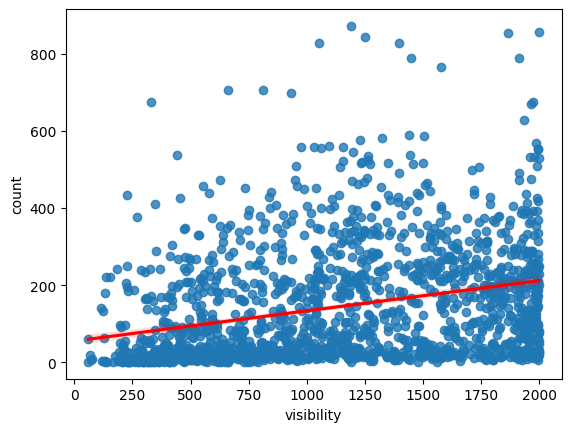

In [108]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=under_visibility_df, x="visibility", y="count", line_kws={'color': 'red'})
plt.show()

In [109]:
spst.pearsonr(under_visibility_df['visibility'], under_visibility_df['count'])

PearsonRResult(statistic=0.29952184680244126, pvalue=1.0456989940185503e-34)

    2000보다 낮은 시정에서 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3이다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

7. 오존 데이터와 따릉이 대여량간 분석

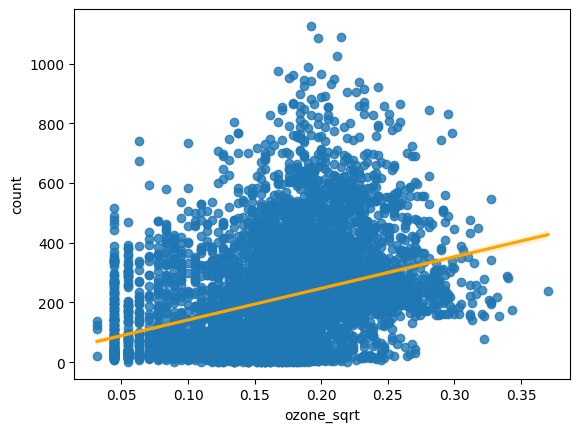

In [110]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=df, x="ozone_sqrt", y="count", line_kws={'color': 'orange'})
plt.show()

In [111]:
spst.pearsonr(df['ozone_sqrt'], df['count'])

PearsonRResult(statistic=0.31135634108227433, pvalue=1.1821803405115806e-127)

    오존과 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3이다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

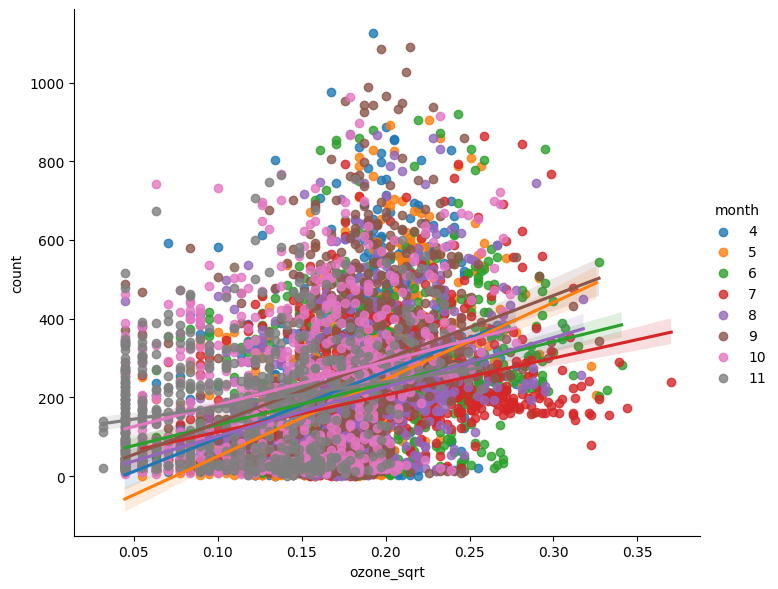

In [112]:
sns.lmplot(data=df, x="ozone_sqrt", y="count", hue="month", height=6, aspect=1.2)
plt.show()

In [113]:
for i in range(4,11):
    print(f'{i}월: ',spst.pearsonr(df.loc[df['month']==i, 'ozone_sqrt'], df.loc[df['month']==i, 'count']))

4월:  PearsonRResult(statistic=0.3516829256835974, pvalue=4.254390834025706e-22)
5월:  PearsonRResult(statistic=0.47483506726283176, pvalue=1.1688917149098188e-42)
6월:  PearsonRResult(statistic=0.32249469116602886, pvalue=1.2700630506637878e-18)
7월:  PearsonRResult(statistic=0.3410424459876278, pvalue=2.938488729810159e-21)
8월:  PearsonRResult(statistic=0.3117102069932659, pvalue=4.5287192184938575e-18)
9월:  PearsonRResult(statistic=0.32075576248565435, pvalue=2.6123740344720137e-18)
10월:  PearsonRResult(statistic=0.331850106032551, pvalue=1.4702563421135088e-19)


    5월에는 오존과의 상관관계가 4.7로 비교적 크다

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

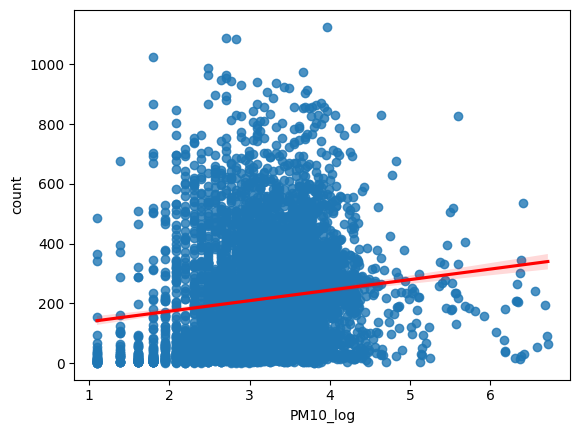

In [114]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=df, x="PM10_log", y="count", line_kws={'color': 'red'})
plt.show()

In [115]:
spst.pearsonr(df['PM10'], df['count'])

PearsonRResult(statistic=0.03284227919927926, pvalue=0.013410061738286802)

In [116]:
spst.pearsonr(df['PM10_log'], df['count'])

PearsonRResult(statistic=0.12912751869326655, pvalue=1.6674124603645982e-22)

    미세먼지 농도와 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3보다 작다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

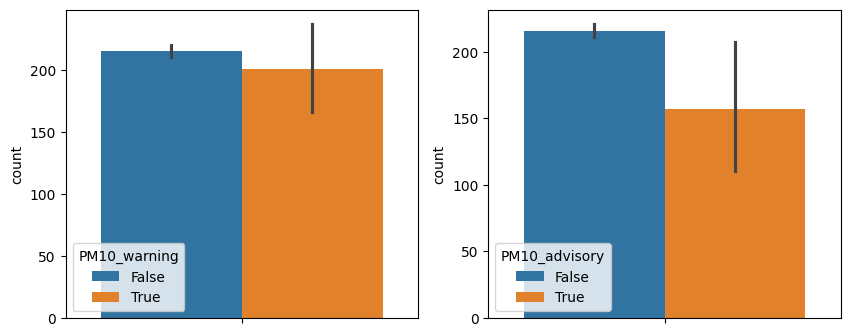

In [117]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=df,y="count", hue="PM10_warning")
plt.subplot(1,2,2)
sns.barplot(data=df,y="count", hue="PM10_advisory")
plt.show()

In [118]:
spst.ttest_ind(df.loc[df["PM10_advisory"]==True, "count"], df.loc[df["PM10_advisory"]==False, "count"], equal_var=False)

TtestResult(statistic=-2.275875069879888, pvalue=0.0323037139291398, df=23.42360807202148)

    PM10 경고는 평균의 차이가 작고 신뢰구간에 겹친다.

    PM10 주의는 pvalue가 0.05보다 작으므로 통계적 유의성이 있으며 t통계량은 -2로 평균의 차이가 있다.

In [119]:
spst.pointbiserialr(df["PM10_advisory"], df["count"])

SignificanceResult(statistic=-0.02066086287134075, pvalue=0.11987484033188428)

    pvalue가 0.05보다 크다.

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

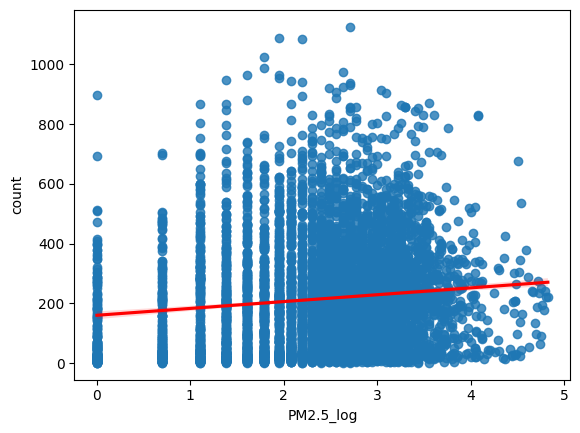

In [120]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(data=df, x="PM2.5_log", y="count", line_kws={'color': 'red'})
plt.show()

In [121]:
spst.pearsonr(df['PM2.5'], df['count'])

PearsonRResult(statistic=0.05436971728589975, pvalue=4.214191279186658e-05)

In [122]:
spst.pearsonr(df['PM2.5_log'], df['count'])

PearsonRResult(statistic=0.10712216841774935, pvalue=6.149946151739472e-16)

    초미세먼지 농도와 따릉이 대여량간 분석의 결과는

    pvalue는 0.05보다 현저히 작지만 피어슨상관계수는 0.3보다 작다.
    상관관계가 통계적으로 유의하지만 그 관계는 약하다.

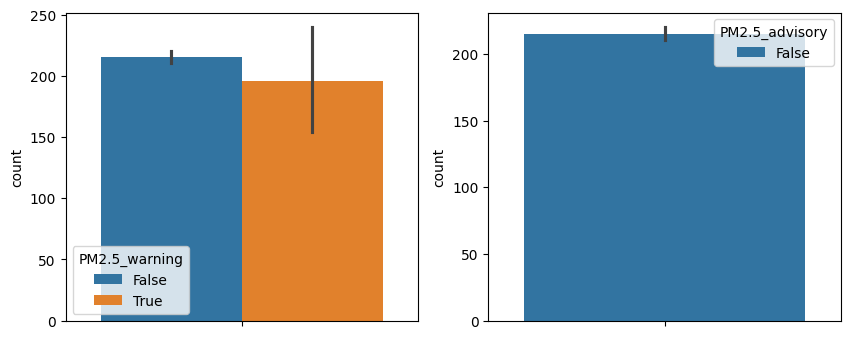

In [123]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=df,y="count", hue="PM2.5_warning")
plt.subplot(1,2,2)
sns.barplot(data=df,y="count", hue="PM2.5_advisory")
plt.show()

In [124]:
spst.ttest_ind(df.loc[df["PM2.5_warning"]==True, "count"], df.loc[df["PM2.5_warning"]==False, "count"], equal_var=False)

TtestResult(statistic=-0.8878105813572059, pvalue=0.379573383931039, df=43.07464963325818)

    pvalue가 0.05보다 높아 PM2.5 경고는 대여수와 통계적 유의미를 찾기 힘들다.

<Axes: >

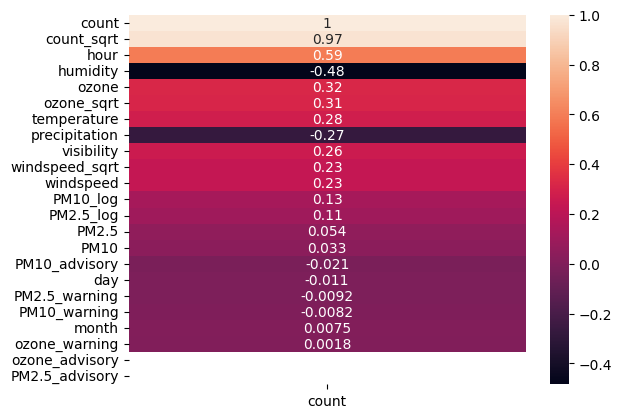

In [125]:
sorted_index = df.corr()['count'].abs().sort_values(ascending=False).index
sns.heatmap(df.corr().loc[sorted_index, ['count']], annot=True)

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

    시간, 습도

#### <font color='green'>2. 약한 관계의 변수</font>


    오존, 온도, 강우 여부, 시계, 풍속

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


    미세먼지, 초미세먼지

### [Step6] Insight 도출

    아주 큰 관계가 있는 요인이 나타나지는 않았다. r > 0.8
    예상대로 시간과 습도에서 상관관계가 있었으며 0.4 < r < 0.6
    다른 요인들의 상관관계는 낮았다.

    월별 상관계수가 다르게 나타나는 걸로 보아 계절성 요인도 있다고 생각되지만
    데이터가 4~11월로 부족해 파악하기는 힘들다